Refer to https://github.com/volkanozsarac/EzGM

# Conditional Spectrum (CS) Based Record Selection

In [ ]:
from time import time
import numpy as np

## A) Example using NGA_W2 database, IM = Sa(T*), and single scenario

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [25]:
# Initialize the object
cs = ConditionalSpectrum(database='NGA_W2', output_directory='Outputs_A')

# Check attributes of ground motion prediction equation AkkarEtAlRjb2014
check_gmpe_attributes(gmpe='AkkarEtAlRjb2014')

GMPE name: AkkarEtAlRjb2014
Supported tectonic region: ACTIVE_SHALLOW_CRUST
Supported standard deviation: Intra event, Total, Inter event
Supported intensity measure: SA, PGA, PGV
Supported intensity measure component: GEOMETRIC_MEAN
Supported SA period range: 0.01 - 4.0
Required distance parameters: rjb
Required rupture parameters: mag, rake
Required site parameters: vs30


### 2) Create target spectrum

C:\Users\osama\AppData\Local\Temp\ipykernel_65568\740288570.py:2083: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_lnSaT[i] = params[0]
C:\Users\osama\AppData\Local\Temp\ipykernel_65568\740288570.py:2084: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_lnSaT[i] = params[1][0]
C:\Users\osama\AppData\Local\Temp\ipykernel_65568\740288570.py:2083: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_lnSaT[i] = params[0]
C:\Users\osama\AppData\Local\Temp\ipykernel_65

Target spectrum is created.


C:\Users\osama\AppData\Local\Temp\ipykernel_65568\740288570.py:481: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatch = [float(self.Tstar * 0.98), float(self.Tstar * 1.02)]


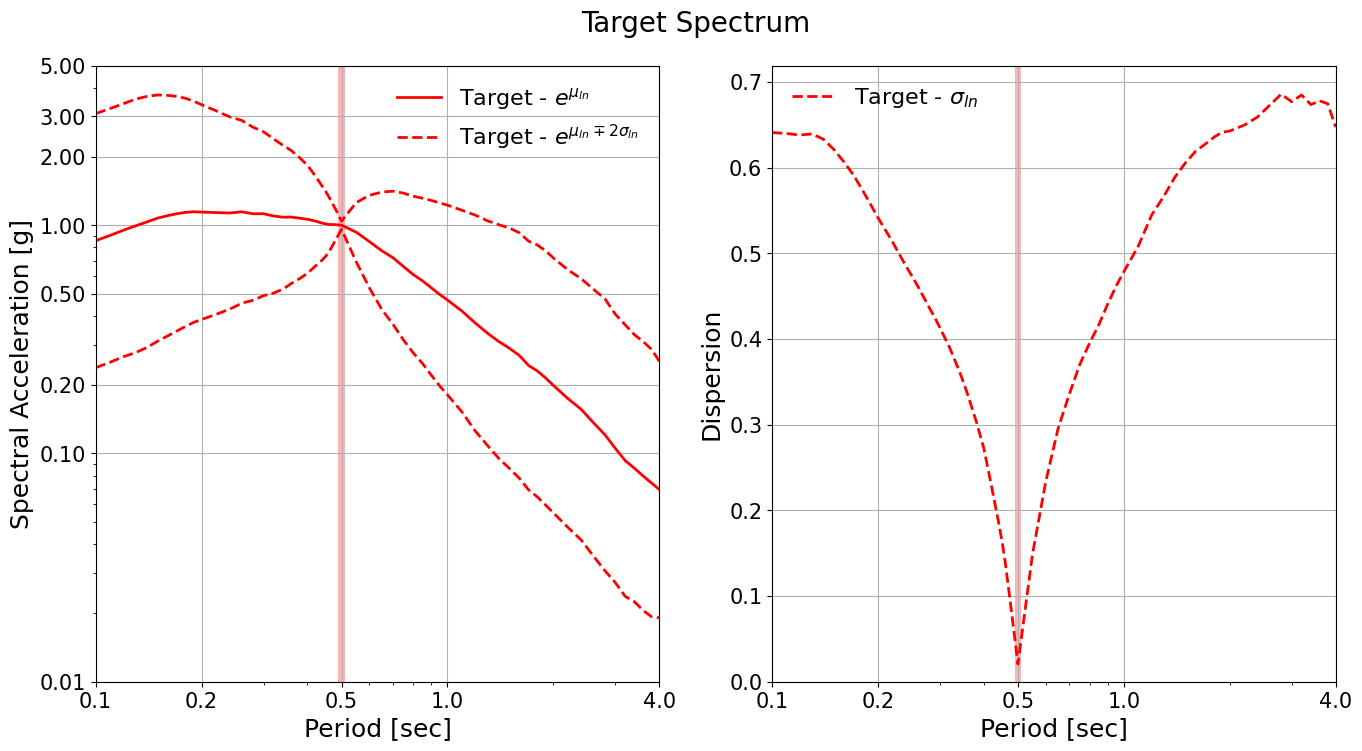

In [26]:
# Note that intensity measure component is GEOMETRIC_MEAN:Geometric mean of two horizontal components
cs.create(Tstar=0.5, gmpe='AkkarEtAlRjb2014', num_components=2, spectrum_definition='GeoMean',
          site_param={'vs30': 500}, rup_param={'rake': [0.0], 'mag': [7.5]},
          dist_param={'rjb': [10]}, hz_cont=None, period_range=[0.1, 4.0],
          im_Tstar=1.0, epsilon=None, use_variance=1, correlation_model='akkar')

# Target spectrum can be plotted at this stage
cs.plot(target=1, simulations=0, records=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.10 - 4.00]
Max error in median = 4.01 %
Max error in standard deviation = 0.88 %
The errors are within the target 10 percent %


C:\Users\osama\AppData\Local\Temp\ipykernel_65568\740288570.py:481: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hatch = [float(self.Tstar * 0.98), float(self.Tstar * 1.02)]


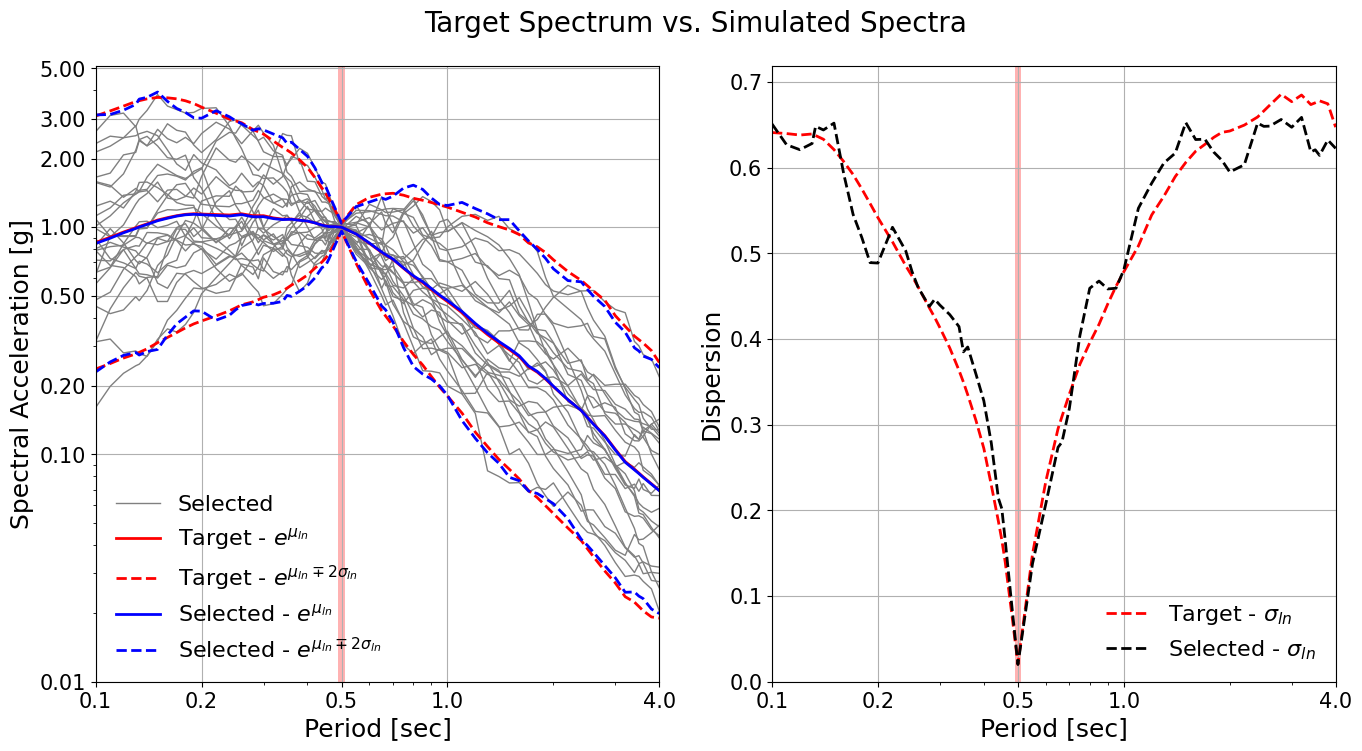

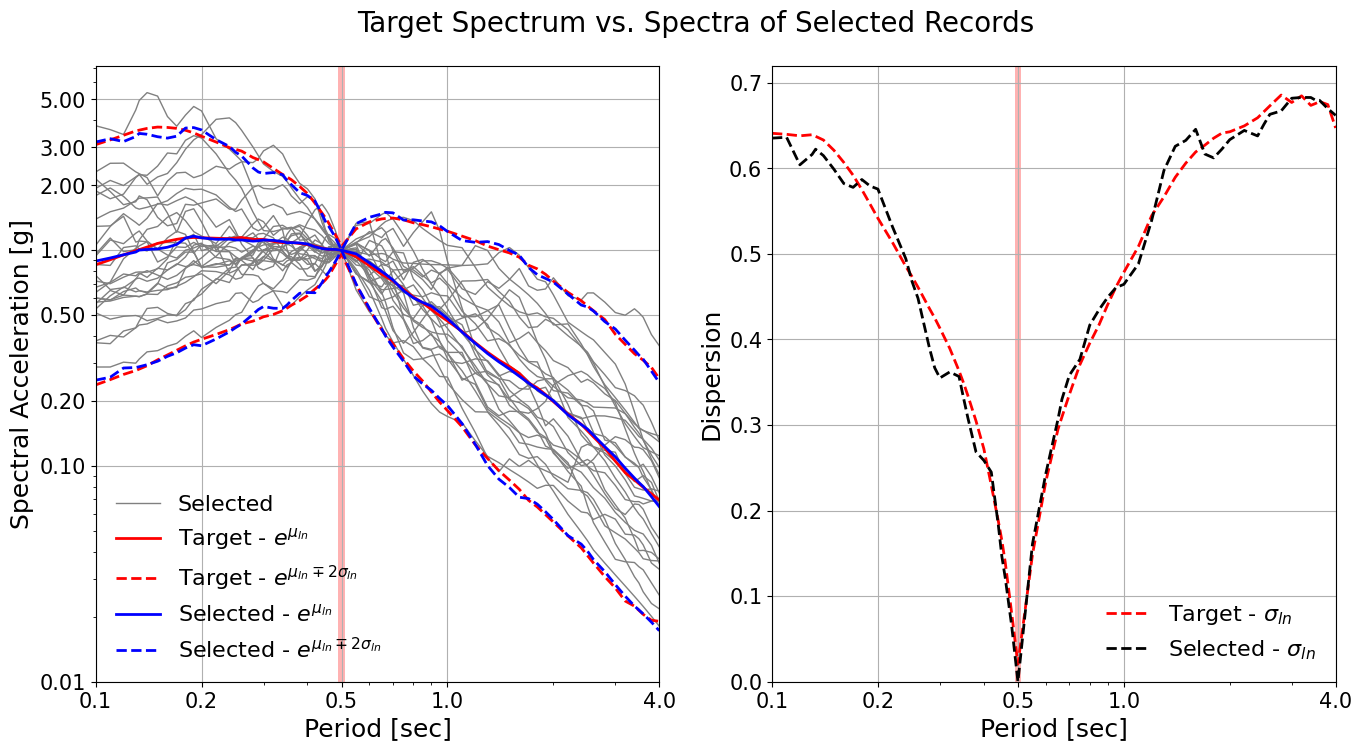

In [27]:
cs.select(num_records=25, is_scaled=1, max_scale_factor=4, num_simulations=20,
          error_weights=[1, 2, 0.3], seed_value=0, num_greedy_loops=2, penalty=1, tolerance=10,
          mag_limits=[5.5, 8], vs30_limits=[360, 760], rjb_limits=[0, 50], mech_limits=None)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(target=0, simulations=1, records=1, save=1, show=1)

### 4) If you have records already inside zip_parent_path\database.zip\database or downloaded records, write whatever you want, the object itself, selected and scaled time histories

In [ ]:
cs.write(object=1, records=0, zip_parent_path='')

Finished writing process, the files are located in
c:\Users\osama\OneDrive\Desktop\EzGM-master 2\EzGM-master\Examples\binder\Outputs_C


## B) Example using ESM_2018 database, IM = Sa(T*), and single scenario

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [ ]:
cs = ConditionalSpectrum(database='ESM_2018', output_directory='Outputs_B')

### 2) Create target spectrum

Target spectrum is created.


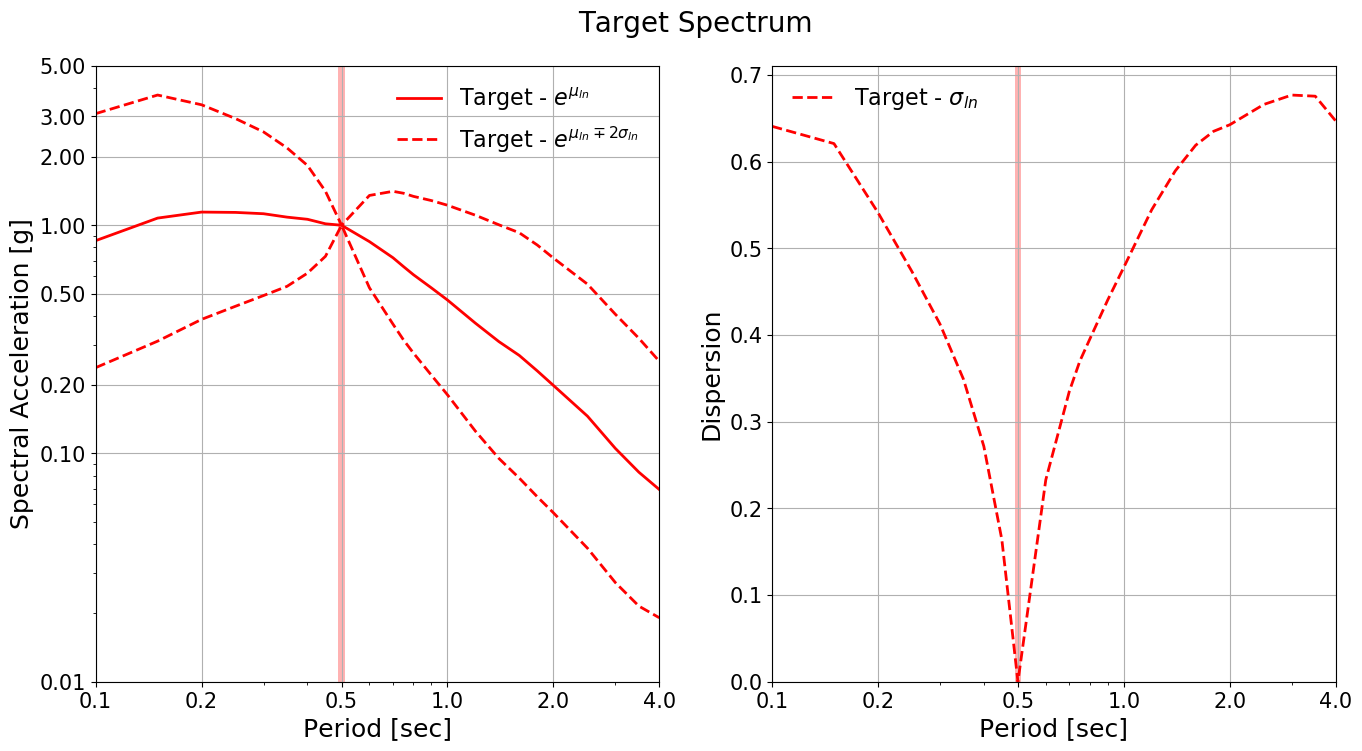

In [11]:
# Note that intensity measure component is GEOMETRIC_MEAN:Geometric mean of two horizontal components
cs.create(Tstar=0.5, gmpe='AkkarEtAlRjb2014', num_components=2, spectrum_definition='GeoMean',
          site_param={'vs30': 500}, rup_param={'rake': [0.0], 'mag': [7.5]},
          dist_param={'rjb': [10]}, hz_cont=None, period_range=[0.1, 4.0],
          im_Tstar=1.0, epsilon=None, use_variance=1, correlation_model='akkar')

# Target spectrum can be plotted at this stage
cs.plot(target=1, simulations=0, records=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.10 - 4.00]
Max error in median = 0.42 %
Max error in standard deviation = 7.47 %
The errors are within the target 10 percent %


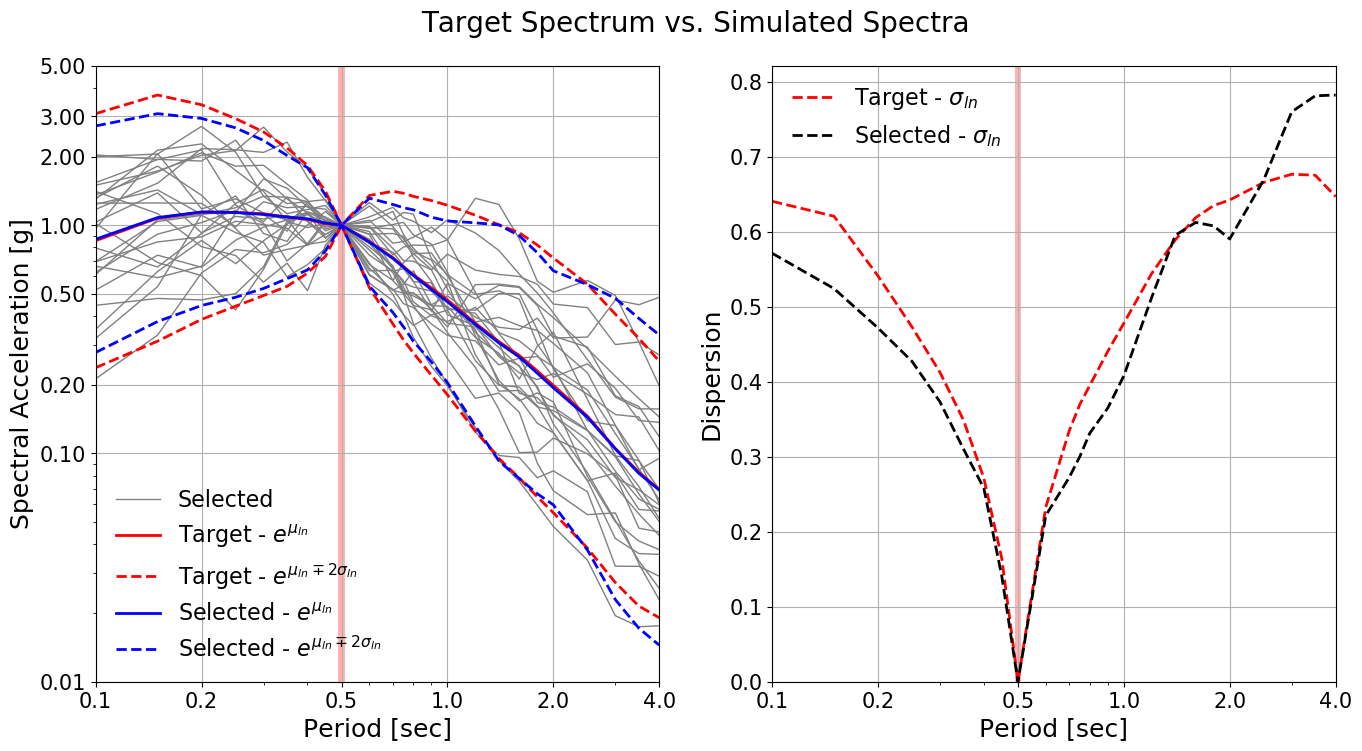

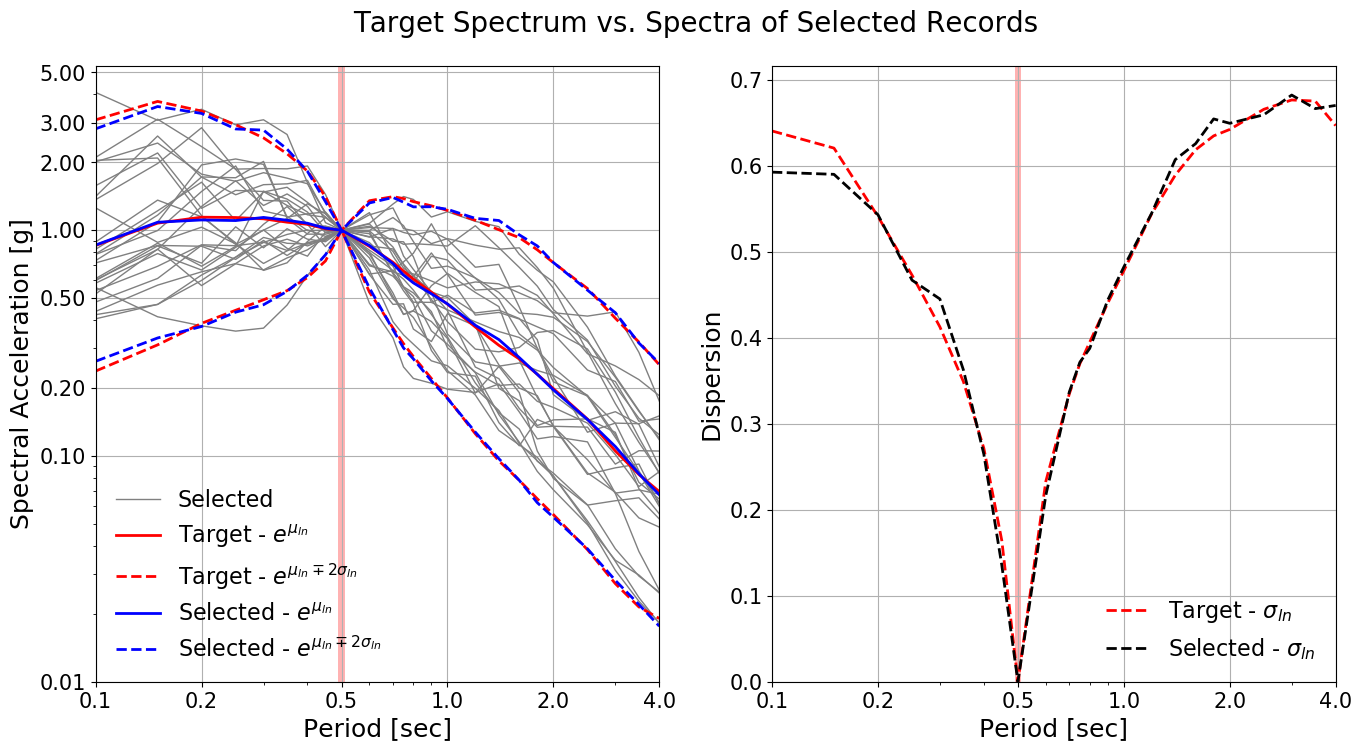

In [12]:
cs.select(num_records=25, is_scaled=1, max_scale_factor=4, num_simulations=20,
          error_weights=[1, 2, 0.3], seed_value=0, num_greedy_loops=2, penalty=1, tolerance=10,
          mag_limits=None, vs30_limits=None, rjb_limits=None, mech_limits=None)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(target=0, simulations=1, records=1, save=1, show=1)

In [ ]:
cs.write(object=1, records=0, zip_parent_path='')

Finished writing process, the files are located in
c:\Users\osama\OneDrive\Desktop\EzGM-master 2\EzGM-master\Examples\binder\Outputs_C


## C) Example using NGA_W2 database, IM = AvgSa(T*), and two scenarios

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [43]:
# initialize the object
cs = ConditionalSpectrum(database='NGA_W2', output_directory='Outputs_C')

# Check attributes of ground motion prediction equation BooreEtAl2014
check_gmpe_attributes(gmpe='BooreEtAl2014')

GMPE name: BooreEtAl2014
Supported tectonic region: ACTIVE_SHALLOW_CRUST
Supported standard deviation: Intra event, Total, Inter event
Supported intensity measure: SA, PGA, PGV
Supported intensity measure component: RotD50
Supported SA period range: 0.01 - 1.4000000000000001
Required distance parameters: rjb
Required rupture parameters: rake, mag
Required site parameters: vs30


### 2) Create target spectrum

Changing number of components to 2 for this horizontal spectra component definition: RotD50...


C:\Users\osama\AppData\Local\Temp\ipykernel_65568\740288570.py:2083: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_lnSaT[i] = params[0]
C:\Users\osama\AppData\Local\Temp\ipykernel_65568\740288570.py:2084: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_lnSaT[i] = params[1][0]
C:\Users\osama\AppData\Local\Temp\ipykernel_65568\740288570.py:2083: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_lnSaT[i] = params[0]
C:\Users\osama\AppData\Local\Temp\ipykernel_65

Target spectrum is created.


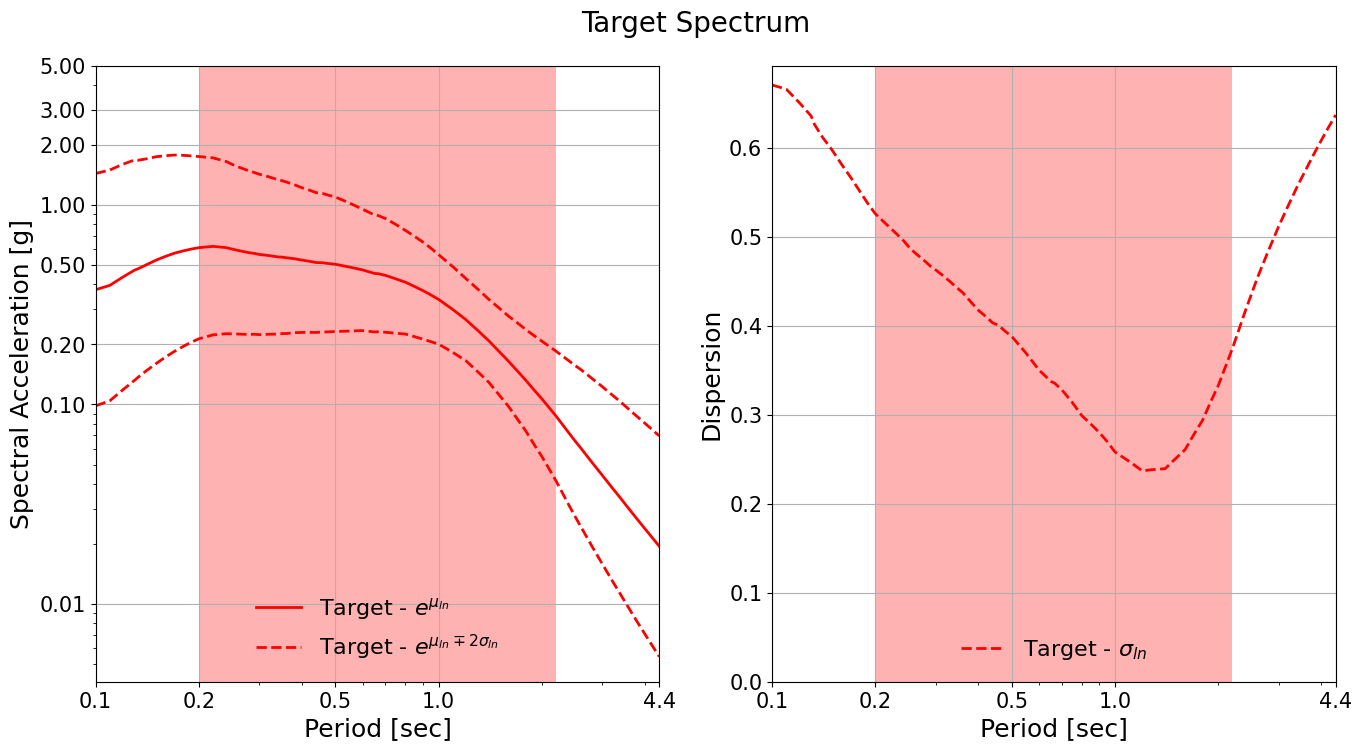

In [19]:
# Note that intensity measure component is RotD50
cs.create(Tstar=np.arange(0.2, 2.4, 0.2), gmpe='BooreEtAl2014', num_components=1, spectrum_definition='RotD50',
          site_param={'vs30': 620}, rup_param={'rake': [0.0, 0.0], 'mag': [6.5, 6.0]},
          dist_param={'rjb': [20, 30]}, hz_cont=[0.4, 0.6], period_range=[0.1, 4.5],
          im_Tstar=0.25, epsilon=None, use_variance=1, correlation_model='baker_jayaram')

# Target spectrum can be plotted at this stage
cs.plot(target=1, simulations=0, records=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.10 - 4.40]
Max error in median = 8.44 %
Max error in standard deviation = 10.44 %


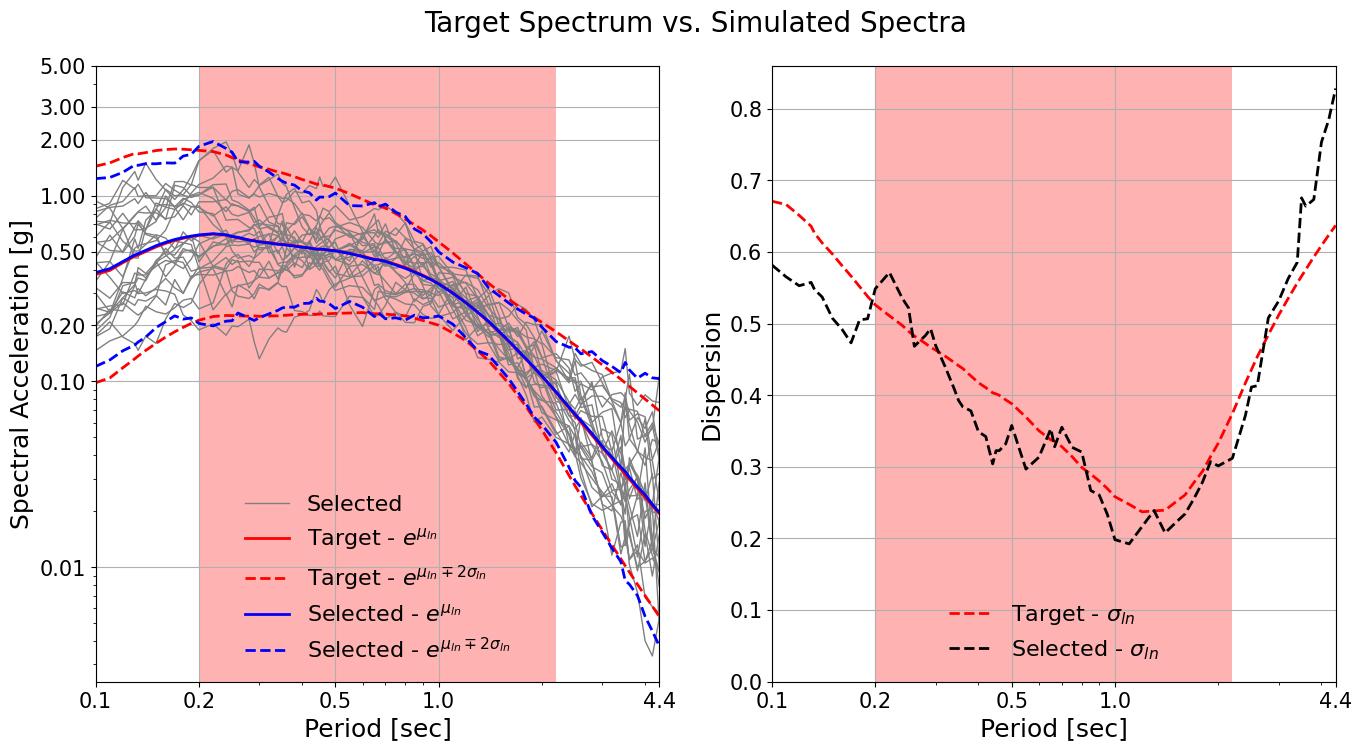

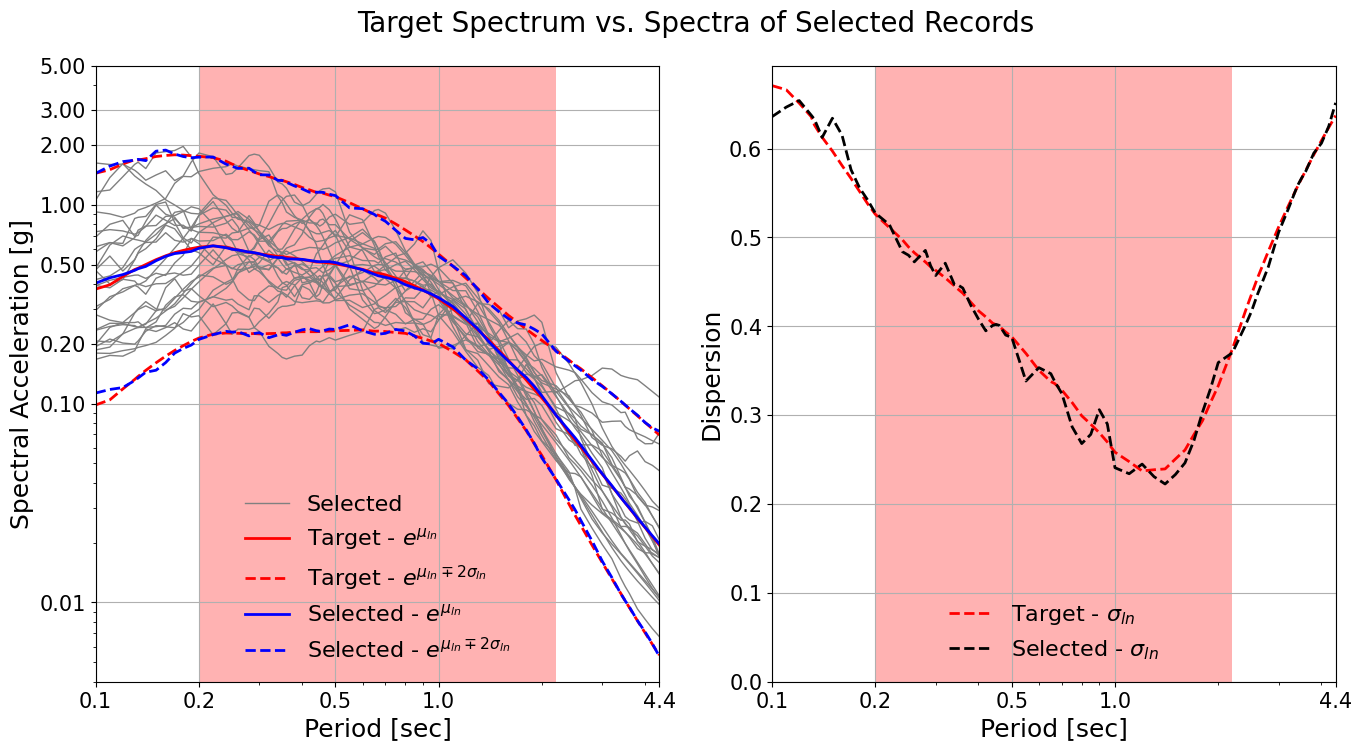

In [24]:
cs.select(num_records=25, is_scaled=1, max_scale_factor=4,
          mag_limits=[5.5, 8], vs30_limits=[360, 760], rjb_limits=[0, 50], mech_limits=None, num_simulations=1,
          error_weights=[1, 2, 0.3], seed_value=0, num_greedy_loops=2, penalty=1, tolerance=10)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(target=0, simulations=1, records=1, save=1, show=1)

In [ ]:
cs.write(object=1, records=0, zip_parent_path='')

Finished writing process, the files are located in
c:\Users\osama\OneDrive\Desktop\EzGM-master 2\EzGM-master\Examples\binder\Outputs_C
